<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/deep_learning/0714_0720_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_dataset = pd.read_csv('/content/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset.describe() #변수간 값의 차이 큼 > normalization

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#min-max normalization : 이상치에 민감
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())

In [ ]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,0.409454,0.400309,0.599691,0.148991,0.333315,0.438821,0.567175,0.036438,0.604838,0.803985,0.575734,0.448807,0.373115,0.329507,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,0.254987,0.490087,0.490087,0.211869,0.301157,0.145420,0.273327,0.067430,0.246831,0.246189,0.482352,0.161577,0.173673,0.106686,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,0.231041,0.000000,0.000000,0.000000,0.060691,0.334569,0.355954,0.005833,0.403206,0.576293,0.000000,0.332459,0.252064,0.253411,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,0.241623,0.000000,1.000000,0.115385,0.228396,0.436593,0.551881,0.009835,0.631088,0.944725,1.000000,0.397239,0.315567,0.310470,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,0.746032,1.000000,1.000000,0.153846,0.576568,0.531412,0.816678,0.025160,0.797078,1.000000,1.000000,0.535339,0.439039,0.406791,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
faults_shuffle = faults_norm.sample(frac = 1) #데이터 섞어줌
print(faults_shuffle[:5])

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
1087   0.165396   0.167934   0.034601  ...        0.0    1.0           0.0
116    0.989443   0.988882   0.026309  ...        0.0    0.0           0.0
965    0.665103   0.674078   0.055587  ...        0.0    1.0           0.0
1031   0.337830   0.338795   0.325751  ...        0.0    1.0           0.0
375    0.547214   0.547689   0.046680  ...        0.0    0.0           0.0

[5 rows x 34 columns]


In [ ]:
faults_np = faults_shuffle.to_numpy() #to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [ ]:
train_ratio = 0.92
input_cnt = 27 
output_cnt = 7

In [ ]:
train_index = int(len(faults_np) * train_ratio)
print(train_index)

1785


In [ ]:
train_X, train_Y = faults_np[:train_index, :-output_cnt], faults_np[:train_index, -output_cnt:]
test_X, test_Y = faults_np[train_index:,:-output_cnt], faults_np[train_index:,-output_cnt:]

In [ ]:
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(1785, 27)
(1785, 7)
(156, 27)
(156, 7)


In [ ]:
#마지막 계층에서 softmax 사용하는 이유 ?

In [ ]:
multi_layer_model = tf.keras.Sequential( [
                                          tf.keras.layers.Dense(units=48,
                                                                activation='elu',
                                                                input_shape=(27,)),
                                          tf.keras.layers.Dense(units=24,
                                                                activation='elu'),
                                          tf.keras.layers.Dense(units=12,
                                                                activation='elu'),
                                          tf.keras.layers.Dense(units=7, 
                                                                activation='softmax') # 종속변수 개수
] )

In [ ]:
multi_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         loss='categorical_crossentropy')

In [ ]:
history = multi_layer_model.fit(train_X, train_Y,
                      epochs=400, batch_size=10)

Epoch 1/400
179/179 [==============================] - 1s 2ms/step - loss: 1.1351
Epoch 2/400
179/179 [==============================] - 0s 2ms/step - loss: 0.9265
Epoch 3/400
179/179 [==============================] - 0s 1ms/step - loss: 0.8517
Epoch 4/400
179/179 [==============================] - 0s 1ms/step - loss: 0.8156
Epoch 5/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7792
Epoch 6/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7863
Epoch 7/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7572
Epoch 8/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7177
Epoch 9/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7084
Epoch 10/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7103
Epoch 11/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7107
Epoch 12/400
179/179 [==============================] - 0s 1ms/step - loss: 0.6945
Epoch 13/400


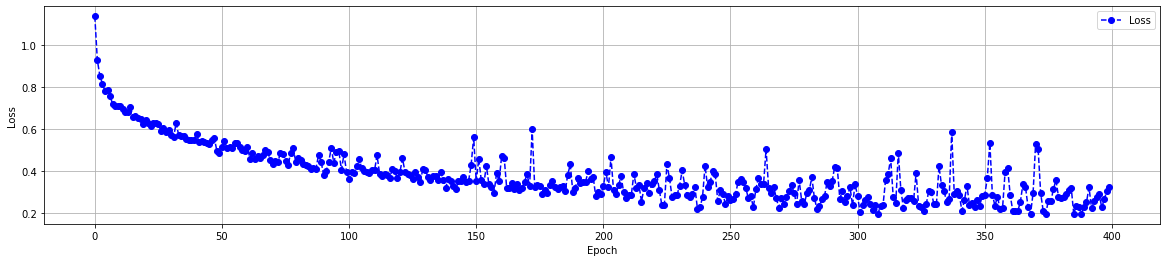

In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'], '--o', color='blue',label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
multi_layer_model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 2ms/step - loss: 1.0368


1.0368225574493408

In [ ]:
pred_Y = multi_layer_model.predict(test_X) 
print(pred_Y) # 확률값

[[2.2417763e-02 2.2249895e-03 2.8482684e-06 ... 1.4439514e-03
  6.5628117e-01 3.1669244e-01]
 [3.9979984e-08 3.7095711e-02 6.8379636e-03 ... 7.8057760e-10
  5.6092581e-03 9.5043796e-01]
 [1.3555990e-14 1.2501159e-05 4.4464085e-17 ... 8.0365114e-20
  1.8367952e-08 9.9998271e-01]
 ...
 [4.6227598e-03 3.6546781e-12 3.7913914e-18 ... 9.8902237e-01
  4.2073170e-06 6.3505815e-03]
 [3.4056949e-08 9.6652746e-01 1.9876756e-05 ... 6.1185471e-17
  8.5204485e-04 3.2600567e-02]
 [1.8640320e-17 9.9976474e-01 1.1851718e-04 ... 3.1678375e-33
  3.8759129e-08 1.1680075e-04]]


In [ ]:
pred_Y = np.argmax(pred_Y, axis=1)
print(pred_Y) # 예측한 라벨값

[5 6 6 5 0 3 6 1 2 0 2 1 2 2 2 0 2 5 1 2 2 5 5 2 6 3 6 6 0 6 5 5 4 5 6 0 6
 2 4 5 1 6 5 5 5 2 1 4 3 0 4 0 6 2 0 4 3 5 5 5 6 2 6 5 6 4 0 1 6 5 6 5 2 1
 2 1 5 5 5 2 5 5 5 5 5 4 2 0 0 2 5 6 3 5 5 5 6 2 1 6 2 1 1 0 5 1 6 5 5 5 5
 3 2 5 5 5 6 5 6 6 6 3 6 2 2 4 2 6 5 2 3 6 0 6 6 2 2 6 6 5 5 1 1 6 6 6 6 6
 5 2 6 5 6 4 1 1]


In [ ]:
test_Y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
test_Y = np.argmax(test_Y, axis=1)
print(test_Y)

[5 6 6 5 5 3 6 1 2 6 2 1 2 2 2 0 2 6 6 2 2 5 5 5 5 3 6 6 6 6 5 5 4 5 5 6 6
 2 4 6 1 5 5 6 6 2 1 4 6 6 4 6 6 2 4 4 3 6 5 5 6 2 6 5 6 6 0 1 6 3 6 6 2 1
 2 1 6 5 5 2 6 5 6 5 5 4 2 0 6 2 1 5 6 5 5 5 5 2 1 6 2 1 1 6 5 6 6 5 5 5 5
 3 2 5 6 0 1 5 5 0 6 3 6 2 2 4 6 0 6 2 3 6 5 0 6 2 2 5 1 5 6 1 1 0 5 6 6 6
 5 2 6 6 6 4 1 1]


In [ ]:
acc = np.mean(np.equal(pred_Y, test_Y)) # 정확도
print(np.round(acc*100, 3))

69.872


In [ ]:
df = pd.read_csv('/content/abalone.csv')
df.info() # 종속변수 : Rings , Sex > one-hot vector 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# 특징에 맞는 정규화기법 선택

In [ ]:
import csv
with open('/content/abalone.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader) # 첫번째 행(문자열) 건너뜀 
  rows= []
  for row in csvreader:
    rows.append(row)

In [ ]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [ ]:
# one-hot vector
input_cnt, output_cnt = 10, 1
data = np.zeros( [len(rows), input_cnt+output_cnt] )
print(data.shape)

(4177, 11)


In [ ]:
for n, row in enumerate(rows):
  if row[0] == 'M': data[n, 0] = 1
  if row[0] == 'F': data[n, 1] = 1
  if row[0] == 'I': data[n, 2] = 1
  data[n,3:] = row[1:]

In [ ]:
data

array([[ 1.    ,  0.    ,  0.    , ...,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.261 ,  0.296 , 10.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.3765,  0.495 , 12.    ]])

In [ ]:
# 학습데이터 분류
train_ratio = 0.8
test_begin_index = int(data.shape[0] * train_ratio)
print(test_begin_index)

3341


In [ ]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map[:10])

[ 314  939 1130 2997 4142 4104 2892 1997  537 3742]


In [ ]:
train_data = data[shuffle_map[:test_begin_index]]
print(train_data.shape)

(3341, 11)


In [ ]:
test_data = data[shuffle_map[test_begin_index:]]
print(test_data.shape)

(836, 11)


In [ ]:
# 데이터 분리
train_X, train_Y = train_data[:, : -output_cnt], train_data[:, -output_cnt : ]
test_X, test_Y = test_data[:, : -output_cnt], test_data[:, -output_cnt : ]
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


In [ ]:
# z-score normalization : 서로 다른데이터 > 정규분포, 이상치에 둔감 / min-max와비교

##### 0716

In [ ]:
train_X_mean = np.mean(train_X, axis = 0)
print(train_X_mean)

[0.37114636 0.307393   0.32146064 0.52402424 0.40799761 0.13972912
 0.82955058 0.35992981 0.18104145 0.23910281]


In [ ]:
train_X_std = train_X.std(axis=0)
print(train_X_std)

[0.48311152 0.46141363 0.46703715 0.12035549 0.09960398 0.04274543
 0.49141513 0.22202338 0.11004149 0.13971866]


In [ ]:
train_X -= train_X_mean
train_X /= train_X_std

In [ ]:
test_X -= train_X_mean
test_X /= train_X_std

In [ ]:
# 마지막 계층 활성함수 사용 x

In [ ]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                        # 첫번째 은닉계층
                                        tf.keras.layers.Dense(units=10,
                                                             activation='elu',
                                                             input_shape=(10,)),
                                        tf.keras.layers.Dense(units=24,
                                                             activation='elu'),
                                        tf.keras.layers.Dense(units=36,
                                                             activation='elu'),
                                        tf.keras.layers.Dense(units=1)                                                        
])

In [ ]:
GJ_NET_MODEL_V1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_6 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# SGD , mini batch SGD
GJ_NET_MODEL_V1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [ ]:
# 학습
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y,
                                epochs = 25,
                                batch_size = 32,
                                # 학습데이터 비율중 20% 검증 데이터
                                validation_split = 0.2 )

Epoch 1/25
84/84 [==============================] - 1s 3ms/step - loss: 10.3139 - val_loss: 6.3505
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 5.5869 - val_loss: 4.3194
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 5.9512 - val_loss: 4.5635
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: 5.3215 - val_loss: 6.3980
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 5.2480 - val_loss: 4.4831
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 5.5228 - val_loss: 4.1626
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 5.0239 - val_loss: 4.6004
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: 5.1974 - val_loss: 4.3268
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 5.2544 - val_loss: 4.8739
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: 5.2783 - val_loss: 4.9703
Epoch 11/25
84/84 

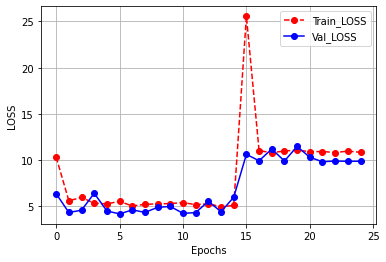

In [ ]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'Train_LOSS')

# 검증데이터에 대한 손실
plt.plot(history_1.history['val_loss'], '-o', color = 'blue', label = 'Val_LOSS')

plt.xlabel("Epochs")
plt.ylabel('LOSS')
plt.legend()
plt.grid()
plt.show()

In [ ]:
GJ_NET_MODEL_V1.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 1ms/step - loss: 9.9721


9.97208309173584

In [ ]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)
print(pred_Y)

[[10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]
 [10.096677]

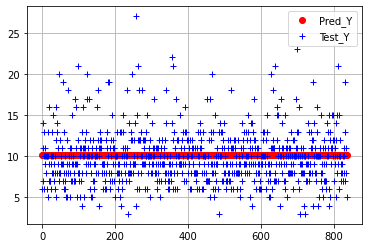

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label = "Pred_Y") # 예측 데이터
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.legend()
plt.grid()

plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V1 - ACC : {} %".format(np.round(acc * 100,3)))

GJ_NET_MODEL_V1 - ACC : 72.642 %


#### 2번째 모델

In [ ]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 1, 
                                                             input_shape = (10,))
])

In [ ]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse',
                        )

In [ ]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y,
                                epochs = 200, batch_size = 32,
                                validation_split = 0.2,
                                # callbacks 조기중단
                                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                              patience = 5)]) 

Epoch 1/200
84/84 [==============================] - 0s 2ms/step - loss: 61.8362 - val_loss: 26.7437
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 15.8345 - val_loss: 6.9481
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 6.4609 - val_loss: 4.4007
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 5.3523 - val_loss: 4.4573
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 5.3035 - val_loss: 4.1892
Epoch 6/200
84/84 [==============================] - 0s 1ms/step - loss: 5.2800 - val_loss: 4.2640
Epoch 7/200
84/84 [==============================] - 0s 1ms/step - loss: 5.2452 - val_loss: 4.1643
Epoch 8/200
84/84 [==============================] - 0s 1ms/step - loss: 5.2791 - val_loss: 4.4536
Epoch 9/200
84/84 [==============================] - 0s 1ms/step - loss: 5.2342 - val_loss: 4.1428
Epoch 10/200
84/84 [==============================] - 0s 1ms/step - loss: 5.2260 - val_loss: 4.1562
Epoch 

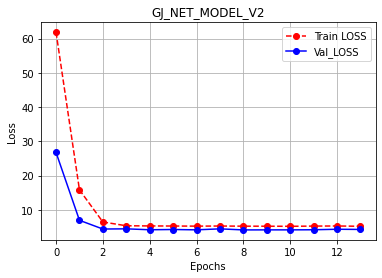

In [ ]:
plt.plot(history_2.history['loss'], '--o', color = 'red', label = 'Train LOSS')
plt.plot(history_2.history['val_loss'], '-o', color = 'blue', label = 'Val_LOSS')

plt.title('GJ_NET_MODEL_V2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# predict
pred_Y =GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[ 8.297011 ]
 [ 9.390346 ]
 [ 7.6265135]
 [ 9.088039 ]
 [10.119396 ]
 [ 7.5732555]
 [13.021049 ]
 [ 9.163686 ]
 [ 8.380068 ]
 [12.864763 ]]


In [ ]:
test_Y[:10]

array([[ 6.],
       [11.],
       [ 7.],
       [14.],
       [10.],
       [ 6.],
       [13.],
       [10.],
       [ 9.],
       [11.]])

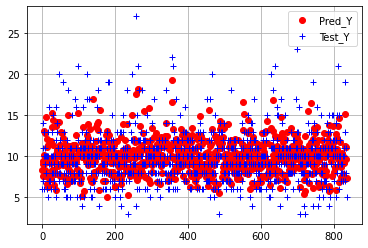

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label='Pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label='Test_Y')

plt.legend()
plt.grid()
plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V2 - ACC {}".format(np.round(acc*100),2))

GJ_NET_MODEL_V2 - ACC 83.0


7/20

In [ ]:
params = GJ_NET_MODEL_V2.get_weights()
print(parmas)

[array([[ 0.12762856],
       [ 0.3537215 ],
       [-0.16342077],
       [ 0.13394286],
       [ 0.8534785 ],
       [ 0.3404339 ],
       [ 2.7911813 ],
       [-3.7958314 ],
       [-0.772447  ],
       [ 1.7653527 ]], dtype=float32), array([9.974518], dtype=float32)]


In [ ]:
print('weight \n', parmas[0])
print('bias \n', params[1])

weight 
 [[ 0.12762856]
 [ 0.3537215 ]
 [-0.16342077]
 [ 0.13394286]
 [ 0.8534785 ]
 [ 0.3404339 ]
 [ 2.7911813 ]
 [-3.7958314 ]
 [-0.772447  ]
 [ 1.7653527 ]]
bias 
 [9.974518]


In [ ]:
# 모델 저장
GJ_NET_MODEL_V2.save('my_model.')

INFO:tensorflow:Assets written to: my_model./assets


In [ ]:
# 모델 불러오기
load_model = tf.keras.models.load_model('/content/my_model.')

In [ ]:
# 불러온 모델 사용하기
load_model.evaluate(test_X,test_Y)

27/27 [==============================] - 0s 927us/step - loss: 4.7417


4.741687774658203

In [ ]:
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_Y = load_model.predict(test_X)
print(pred_Y[:10])

[[ 8.297011 ]
 [ 9.390346 ]
 [ 7.6265135]
 [ 9.088039 ]
 [10.119396 ]
 [ 7.5732555]
 [13.021049 ]
 [ 9.163686 ]
 [ 8.380068 ]
 [12.864763 ]]
